<a href="https://colab.research.google.com/github/PtrShi/cvr_course/blob/main/notebooks/cv_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 3

1) [1 балл] Реализуйте чтение изображений, лежащих в /data/imgs/arrow (как в демо с калибровкой камеры с семинара). Вся обязательная часть задания выполняется с этими изображениями

1) [2 балла] Реализуйте нахождение расстояния от камеры до листка, учитывая, что это тот же листок, что был в первом демо

2) [3 балла] Реализуйте приведение изображения листка к "виду сверху"

3) [6 баллов] Реализуйте определение направления, в котором указывает стрелка. Можно использовать скелетонизацию из первого семинара по зрению: получить маску темной области (стрелки) внутри изображения листка, применить скелетонизацию, вычислить направление. Можно поступить иначе: после нахождения маски вычислить градиенты Собеля по x и y и проанализировать их направления. P.S. Можно использовать и полностью свой метод

4) [3 балла] Доп. задача 1: Примените написанный Вами код к видео https://drive.google.com/file/d/1AQhg2lL5FL4edlOcxY2SHOOZ-v9TgHBD/view?usp=sharing. Загрузите видео на свой гугл диск, а затем дополните имеющийся код монтированием диска и чтением в цикле кадров видео, приведёнными в конце семинара

5) [5 баллов] Доп. задача 2: определите, нормально ли видно листок в кадре. На некоторых кадрах его видно не полностью, один или больше уголков находятся за кадром. Это можно автоматически обнаруживать, к примеру используя размеры стрелки, и выводить на соответствующем кадре маркер - текст или цветную метку

In [1]:
!git clone https://github.com/PtrShi/cvr_course.git
#%cd "cvr_course/notebooks"
#!ls

Cloning into 'cvr_course'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 208 (delta 24), reused 0 (delta 0), pack-reused 167
Receiving objects: 100% (208/208), 48.26 MiB | 19.80 MiB/s, done.
Resolving deltas: 100% (60/60), done.


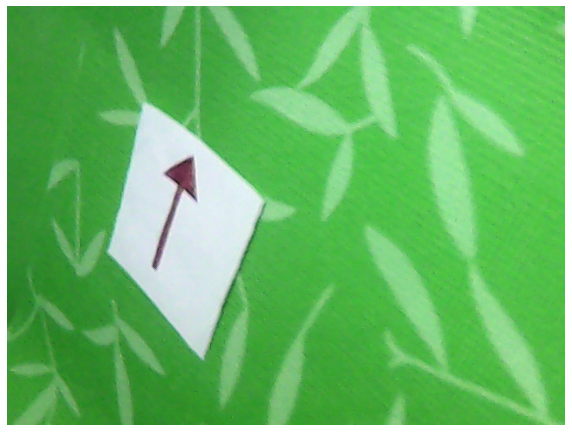

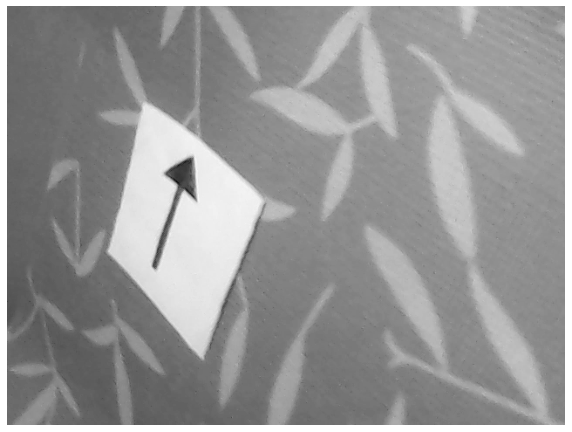

In [2]:
import numpy as np
import cv2
import time
import os
import math
import sys
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
imgdir = 'cvr_course/data/imgs/arrow/'
filename = 'vlcsnap-2020-10-21-18h01m22s212.png'
#filename = 'vlcsnap-2020-10-21-18h01m51s638.png'
img_orig = cv2.imread (imgdir + filename, cv2.IMREAD_COLOR)
if img_orig is None:
  assert False, 'no such a file'
plt.imshow (img_orig)  
plt.axis ('off')
plt.show ()
img_bw = cv2.cvtColor (img_orig, cv2.COLOR_BGR2GRAY)
plt.imshow (img_bw, cmap = 'gray')
plt.axis ('off')
plt.show ()

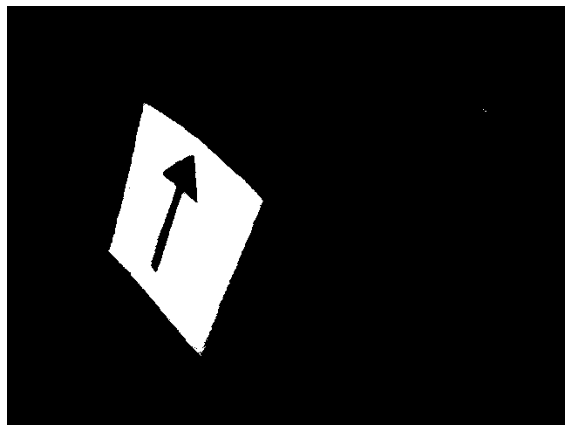

In [3]:
# Mask
low_th  = (210) #, 200, 200)  # Надо менять в зависимости от картинки
high_th = (255) #, 255, 255)

mask = cv2.inRange (img_bw, low_th, high_th)
# ker_sz = 3
# kernel = np.ones ((ker_sz, ker_sz), np.uint8)
# mask = cv2.dilate (mask, kernel, iterations = 1)  

plt.imshow (mask, cmap = 'gray')
plt.axis ('off')
plt.show ()

In [20]:
# ищем контуры
contours, _ = cv2.findContours (mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
j = 1 
ind_largest_cont = 0 # let's find the largest contour
# I'm not so good with python magic
while j < len (contours):
  if len (contours [j]) > len (contours [ind_largest_cont]):
    ind_largest_cont = j
  j = j + 1

cnt = contours [ind_largest_cont]
print (cnt)

cnt_raw = cv2.drawContours (img_orig.copy (), -1, 0, (0, 255, 0), 5)
plt.imshow (cnt_raw)
plt.text (20, 20, 'raw contours', fontsize=14)
plt.axis ('off')
plt.show ()

#print (np.shape (cnt))
cnt_hull = cv2.convexHull (cnt)
cnt_hull_draw = cv2.drawContours (img_orig.copy (), cnt_hull, -1, (255, 0, 0), 10)
print (np.shape (cnt_hull))
plt.imshow (cnt_hull_draw)
plt.text (20, 20, 'Hull contours', fontsize=14)
plt.axis ('off')
plt.show ()

# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html
# epsilon - это минимальное расстояние, а не мелкость разбиения (в семинаре ошибка)
epsilon = 0.05 * cv2.arcLength (cnt_hull, True)
vertices = cv2.approxPolyDP (cnt_hull, epsilon, True)
vertices_draw = cv2.drawContours (img_orig.copy (), vertices, -1, (0, 0, 255), 10)
plt.imshow (vertices_draw)
plt.text (20, 20, 'vertices', fontsize=14)
plt.axis ('off')
plt.show ()

[[[157 111]]

 [[156 112]]

 [[157 113]]

 [[156 114]]

 [[156 121]]

 [[155 122]]

 [[155 123]]

 [[154 124]]

 [[154 127]]

 [[153 128]]

 [[153 131]]

 [[152 132]]

 [[152 137]]

 [[150 139]]

 [[150 143]]

 [[149 144]]

 [[149 147]]

 [[148 148]]

 [[148 154]]

 [[147 155]]

 [[147 161]]

 [[146 162]]

 [[146 166]]

 [[145 167]]

 [[145 168]]

 [[144 169]]

 [[144 172]]

 [[143 173]]

 [[143 180]]

 [[142 181]]

 [[142 183]]

 [[141 184]]

 [[141 188]]

 [[140 189]]

 [[140 191]]

 [[139 192]]

 [[139 196]]

 [[138 197]]

 [[138 200]]

 [[137 201]]

 [[137 203]]

 [[136 204]]

 [[136 208]]

 [[135 209]]

 [[135 212]]

 [[134 213]]

 [[134 218]]

 [[133 219]]

 [[134 220]]

 [[133 221]]

 [[133 222]]

 [[132 223]]

 [[132 226]]

 [[131 227]]

 [[131 231]]

 [[130 232]]

 [[130 234]]

 [[129 235]]

 [[129 237]]

 [[128 238]]

 [[128 240]]

 [[127 241]]

 [[127 242]]

 [[126 243]]

 [[126 249]]

 [[125 250]]

 [[125 253]]

 [[124 254]]

 [[124 260]]

 [[122 262]]

 [[122 264]]

 [[121

In [ ]:
def order_points(pts):
# Семинарская реализация неверна
# Взял отсюда, оч красиво, только для выпуклых
# https://stackoverflow.com/questions/62295185/warping-a-license-plate-image-to-be-frontal-parallel    

    # Step 1: Find centre of object
    center = np.mean(pts)

    # Step 2: Move coordinate system to centre of object
    shifted = pts - center

    # Step #3: Find angles subtended from centroid to each corner point
    theta = np.arctan2 (shifted[:, 0], shifted[:, 1])

    # Step #4: Return vertices ordered by theta
    ind = np.argsort(theta)
    return pts[ind]

In [ ]:
# https://stackoverflow.com/questions/62834517/how-to-read-the-result-of-cv2-findcontours
# см комментарии в ответу
vertices_norm = vertices [:,0,:]
print (vertices_norm)
rect = order_points (vertices_norm)
print (rect)

[[157 111]
 [293 223]
 [222 400]
 [116 280]]
[268 516 622 396]
[[-46]
 [-70]
 [178]
 [164]]
[[157. 111.]
 [293. 223.]
 [222. 400.]
 [222. 400.]]
